# This notebook is followed by a kaggle notebook
## It's code is shitty as hell, it makes some wrong assumptions
## Pros: Some useful methodologies and plots

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pandas.api.types import CategoricalDtype
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
data_path = "./data/house-prices-advanced-regression-techniques/"
df_train = pd.read_csv(data_path + 'train.csv')

In [242]:
pd.options.display.max_rows = 999
# for i in df_train.columns:
#    print(i)

In [35]:
# MSZoning has different stages according to population density
# Question: Should we set order on every categorical variable?
# zoning_type = CategoricalDtype(categories=['RL', 'RM', 'C (all)', 'FV', 'RH'],
# ordered=True)
# df_train.MSZoning = df_train.MSZoning.astype(zoning_type)
# df_train.MSZoning.unique()

['RL', 'RM', 'C (all)', 'FV', 'RH']
Categories (5, object): ['RL' < 'RM' < 'C (all)' < 'FV' < 'RH']

In [46]:
df_train.LandContour

0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
       ... 
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: LandContour, Length: 1460, dtype: object

In [50]:
df_train.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

## First things first: analysing 'SalePrice

In [221]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

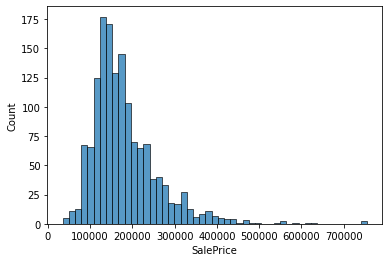

In [222]:
sns.histplot(df_train.SalePrice);

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

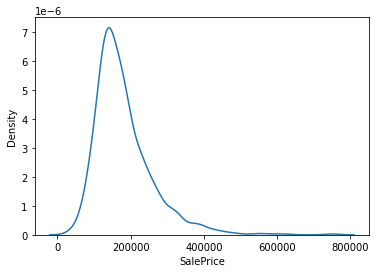

In [81]:
sns.kdeplot(df_train.SalePrice)

Positive skeweness and kurtosis which means mass is on the left, and it's more likely to have price
less than the mean, also the high kurtosis means there are outliers - probably expensive houses.

In [82]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [214]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Relationship with categorical features

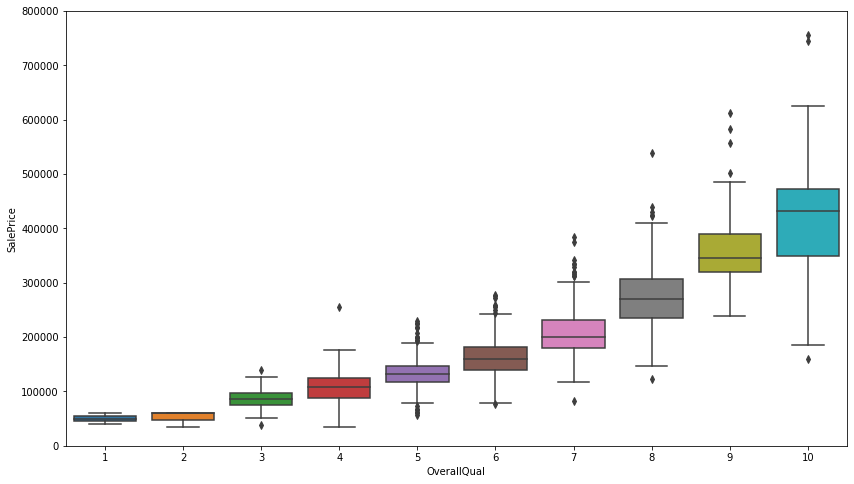

In [204]:
MAX_Y = 800000
plt.figure(figsize=(14, 8))
fig = sns.boxplot(data=df_train, y='SalePrice', x='OverallQual')
fig.axis(ymin=0, ymax=MAX_Y);

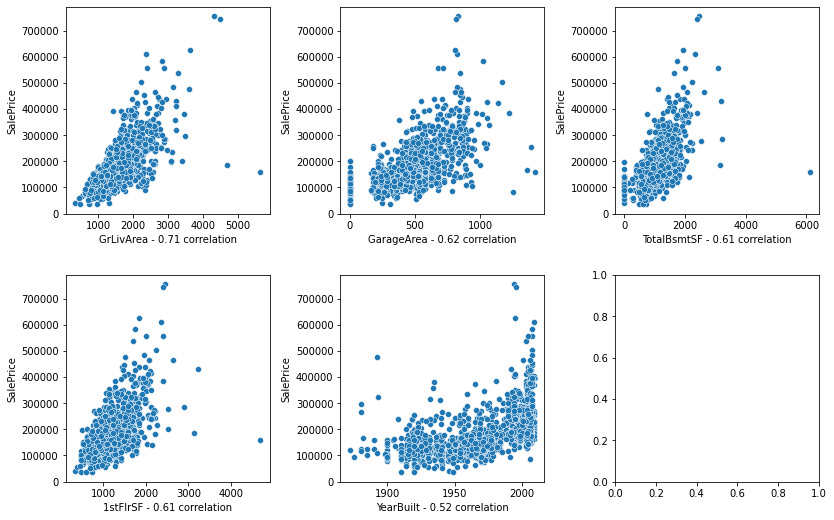

In [224]:
first_correlated = corr['SalePrice'][1:10]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=4)

numerical_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
for i, feature in enumerate(numerical_features):
    ax = sns.scatterplot(x=feature, y='SalePrice', data=df_train, ax=axes.flatten()[i])
    ax.set(xlabel="{} - {:02.2f} correlation".format(ax.get_xlabel(), corr[feature]["SalePrice"]))

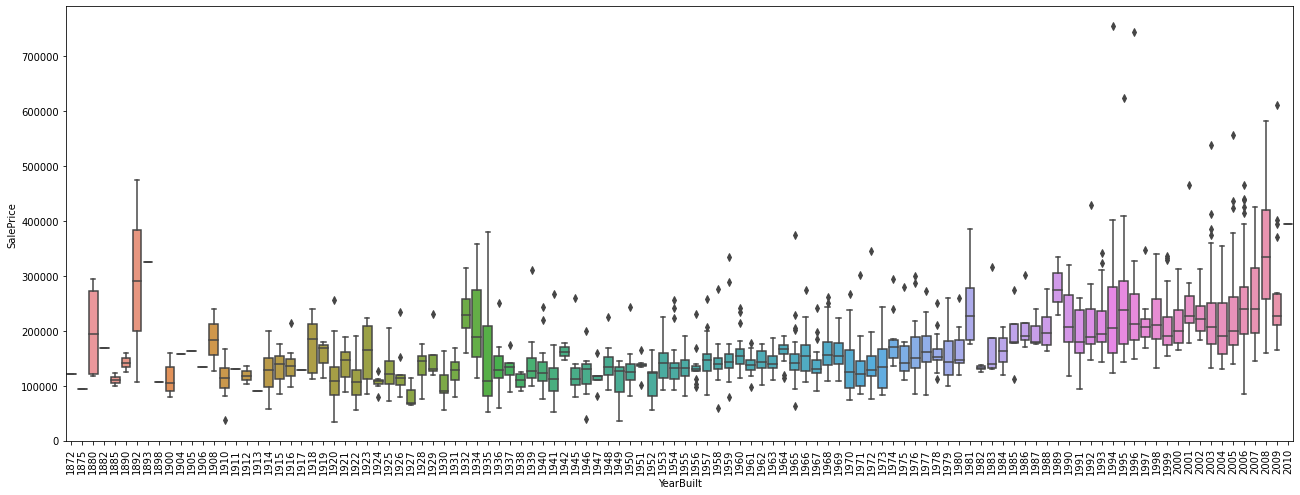

In [220]:
plt.figure(figsize=(22, 8))
ax = sns.boxplot(data=df_train, y='SalePrice', x='YearBuilt')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

# 3. Keep calm and work smart. Relationship with numerical variables.

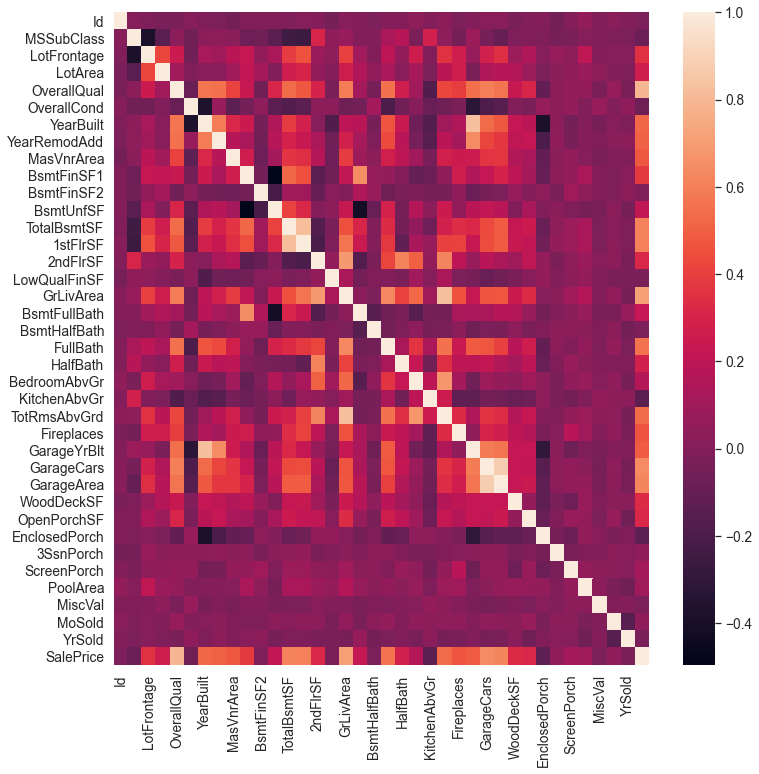

In [228]:
cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF']
corr = df_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data=corr);

# See correlation between some of the features and conclude which is unnecessary

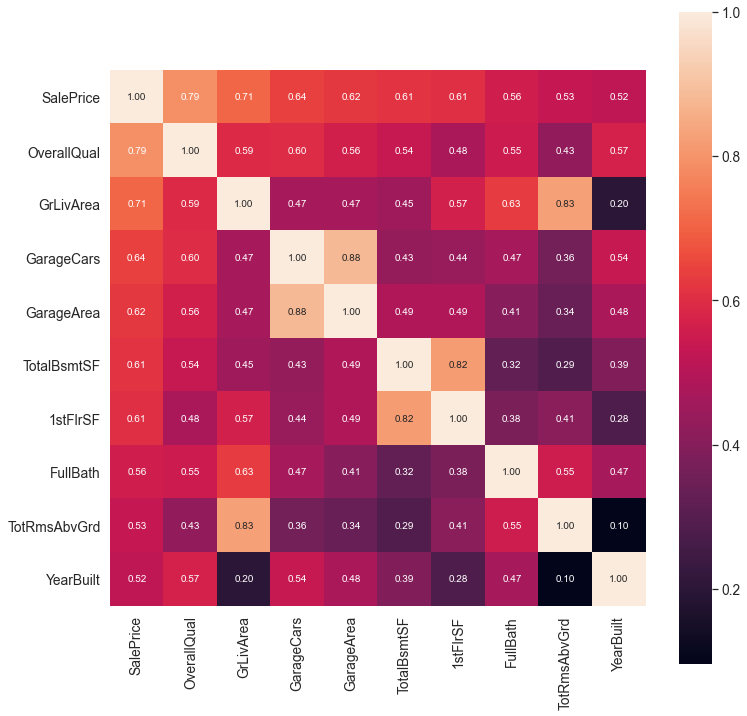

In [227]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
fig = plt.figure(figsize=(12, 12))
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### We'll keep garage cars instead of garage area
### Totam bsmtsf instead of 1stflrsf
### keep GrLivArea instead of TotRmsAbvGrd since it's more correlated

#### homework: do some time series analysis with year built

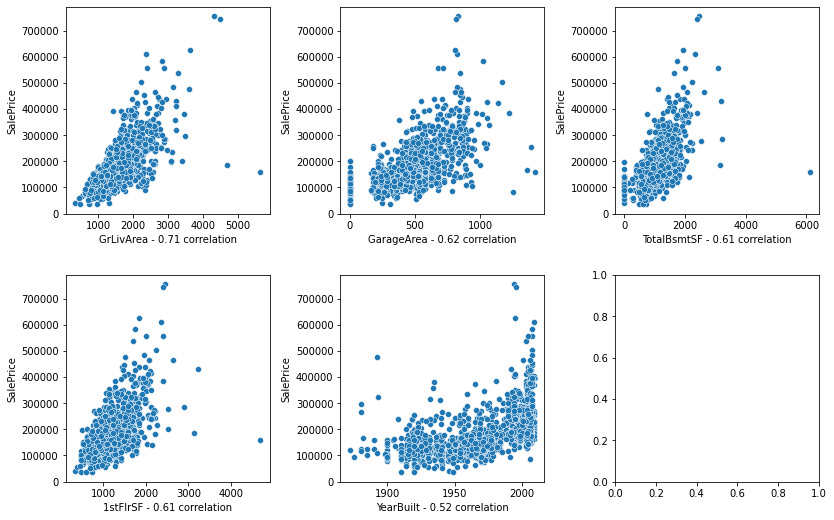

In [223]:
first_correlated = corr['SalePrice'][1:10]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.tight_layout(pad=4)

numerical_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']
for i, feature in enumerate(numerical_features):
    ax = sns.scatterplot(x=feature, y='SalePrice', data=df_train, ax=axes.flatten()[i])
    ax.set(xlabel="{} - {:02.2f} correlation".format(ax.get_xlabel(), corr[feature]["SalePrice"]))

## A BETTER WAY TO PLOT THE CORRELATIONS USING PAIRPLOT

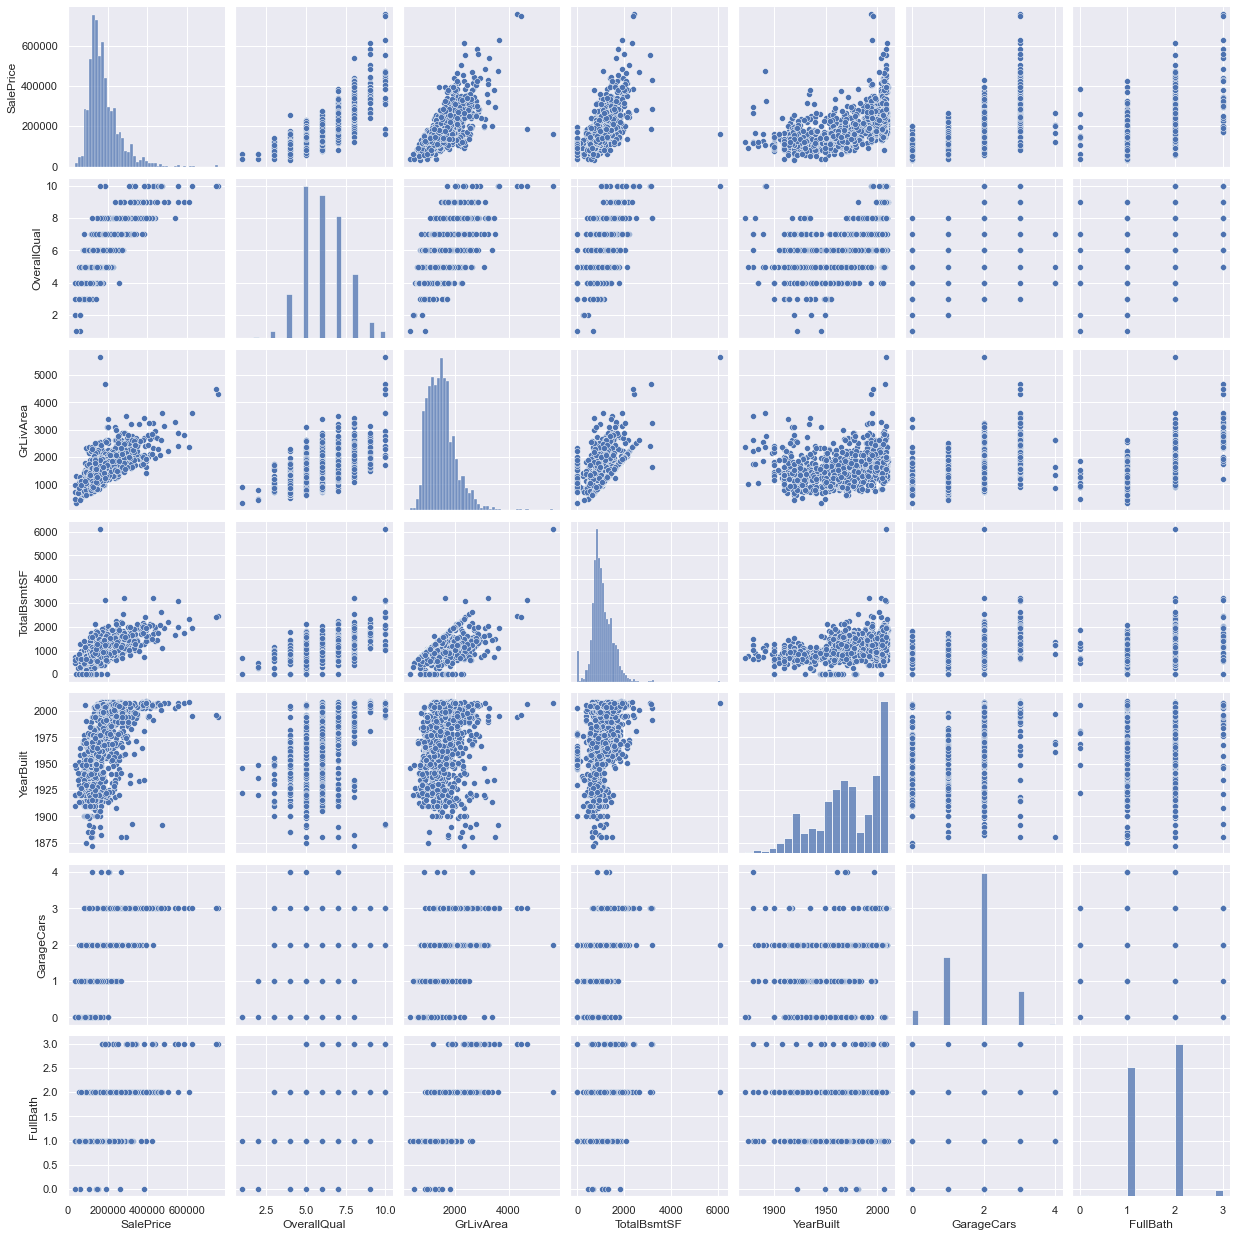

In [231]:
sns.set()`
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageCars', 'FullBath']
sns.pairplot(df_train[cols], size=2.5)
plt.show()
# That's a lot better than what I did above, a lot shorter :D

# 4. Missing Data

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?


Markup : - [ ] An uncompleted task
          - [x] A completed task

In [292]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
n = df_train.shape[0]
missing_data_percentages = (total / n).sort_values(ascending=False)
missing_data = pd.concat([total, missing_data_percentages], axis=1, keys=['Total', 'Percentages'])
missing_data.head()

,Total,Percentages
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed

In [297]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

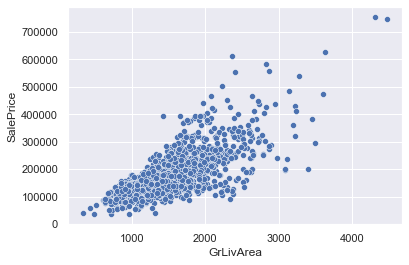

In [303]:
indices_to_remove = df_train.sort_values(by='GrLivArea', ascending=False)[0:2].index
df_train = df_train.drop(indices_to_remove)
sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')
# we removed the outliers since they do not represent our data correctly

# Testing the assumptions
* linear relationship between Y and f(X)
* normality of the residuals
* homoscedasticity
* uncorrelated errors